### Moduły
Importujemy biblioteki

In [11]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA
from matplotlib import pyplot
import numpy as np

### Dane
Tworzymy przykładowe dane:

In [12]:
docs = ['fantasticly done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']

labels = np.array([[1.],[1.],[1.],[1.],[1.],[0.],[0.],[0.],[0.],[0.]])


### Embeddingi

Zamieniemy słowa na losowo wybrane liczby w zakresie do 100

In [13]:
vocab_size = 100
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)


[[18, 51], [82, 69], [39, 34], [68, 69], [93], [95], [93, 34], [17, 82], [93, 69], [5, 26, 51, 61]]


Wyrównujemy wejście, żeby wszystkie były takie same:

In [14]:
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[18 51  0  0]
 [82 69  0  0]
 [39 34  0  0]
 [68 69  0  0]
 [93  0  0  0]
 [95  0  0  0]
 [93 34  0  0]
 [17 82  0  0]
 [93 69  0  0]
 [ 5 26 51 61]]


Definiujemy model:

In [15]:
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 8)              800       
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Trenujemy i oceniamy model:

In [16]:
model.fit(padded_docs, labels, epochs=3, verbose=1)

loss, accuracy = model.evaluate(padded_docs, labels, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Epoch 1/3
1/1 [==============================] - 1s 940ms/step - loss: 0.6945 - acc: 0.5000
Epoch 2/3
1/1 [==============================] - 0s 18ms/step - loss: 0.6933 - acc: 0.5000
Epoch 3/3
1/1 [==============================] - 0s 176ms/step - loss: 0.6909 - acc: 0.6000
Accuracy: 60.000002


Prezentujemy embeddingsy na wykresie:

(100, 8)


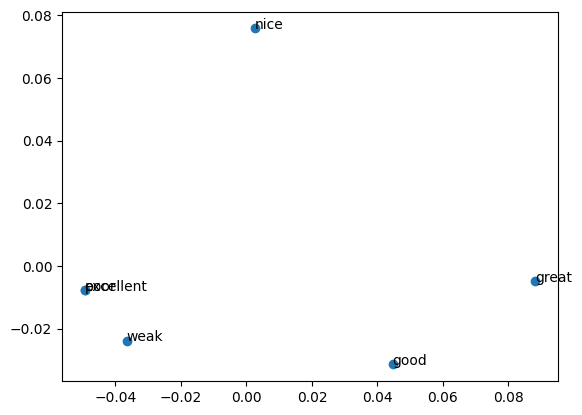

In [17]:
words = ['good','great','nice','excellent','weak','poor']
encoded_word = [one_hot(d, vocab_size) for d in words]

line = to_categorical(encoded_word, num_classes=vocab_size)


weights = model.layers[0].get_weights()[0]

print(weights.shape)

emb_words = np.dot(line, weights)


pca = PCA(n_components=2)
result = pca.fit_transform(emb_words)

pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


### Zadania

* Spróbować napisać własne teksty i labelki do nich (binarne) - sprawdzić jak działają embeddingi
* Spróbować napisać własne teksty i labelki do nich (więcej niż dwie) - sprawdzić jak działają embeddingi